<a href="https://colab.research.google.com/github/LeonardoNerydeSouza/Deep-Learning-/blob/master/P1T4_mark_bank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MARK.BANK

##Modificación del DataSet

###Importar librerías

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


###Importar csv de Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
4/3wGSqDqgxxnRqxasPvCyA5UrROk0Secp0-4F3akX9SdLESFNOdh73Dc
Mounted at /content/drive


In [ ]:
df=pd.DataFrame
df=pd.read_csv('/content/drive/My Drive/Deep learning/mercadeo_bancario.csv', encoding='utf-8')

###Listar datos

Visualizamos los datosque contiene la tabla

In [ ]:
df.head(10)

,edad,trabajo,estado_civil,educacion,total_hijos,credito_sin_pago,prestamo_vivienda,prestamo_personal,valor_prestamo,tarjetas_credito,contacto,mes,dia_semana,duracion_ultimo_contacto,dias_ultimo_contacto,anterior_contacto,numero_empleados,si_no
0,44,blue-collar,married,preschool,7,unknown,yes,no,268017,5,cellular,aug,thu,210,43,0,88,0
1,53,technician,married,unknown,1,no,no,no,0,0,cellular,nov,fri,138,0,0,14,0
2,28,management,single,university.degree,3,no,yes,no,308036,0,cellular,jun,thu,339,27,2,1993,1
3,39,services,married,Technological_school,1,no,no,no,0,4,cellular,apr,fri,185,0,0,1338,0
4,55,retired,married,preschool,2,no,yes,no,249888,4,cellular,aug,fri,137,2,1,1184,1
5,30,management,divorced,preschool,6,no,yes,no,499476,1,cellular,jul,tue,68,90,0,1553,0
6,37,blue-collar,married,preschool,6,no,yes,no,86520,5,cellular,may,thu,204,66,0,442,0
7,39,blue-collar,divorced,tecnical_school,4,no,yes,no,176081,1,cellular,may,fri,191,51,0,495,0
8,36,admin.,married,university.degree,6,no,no,no,0,3,cellular,jun,mon,174,0,1,1097,1
9,27,blue-collar,single,preschool,3,no,yes,no,323709,1,cellular,apr,thu,191,33,1,414,0


Podemos observar que existen datos en forma de texto, para poder analizarlos vamor a convertirlos a datos numéricos

###Conversión de datos numéricos

Trabajo: 
*   Unknown = 0
*   Blue-collar = 1
*   Technician = 2
*   Services = 3
*   Retired = 4
*   Admin = 5
*   Housemaid = 6
*   Unemployed = 7
*   Entrepreneur = 8
*   Managment = 9
---
Estado_civil: 
*   unknown = 0
*   Divorced = 1
*   Married = 2
*   Single = 3
---
Educación: 
*   Unknown = 0
*   Preschool = 1
*   University.degree = 2
*   Technological_school = 3
*   tecnical_school = 4
*   professional.course = 5
*   primary_school = 6
*   Illiterate = 7
---
Categorías de si/no:
*   Unknown = 0 
*   No = 1
*   Si = 2
---
Contacto: 
*   Celular = 0
*   Teléfono = 1
---
Mes: 
*   En orden: JAN=0, FEB=1, MAR=2, etc
---
Dia_de_la_semana: 
*   En orden -> MON = 0, TUE=1, WED=2, etc
---































Reemplazamos los valores de trabajo y listamos la tabla, PANDAS cuenta con una característica llamada *replace*

In [ ]:
#Pandas tiene una característica llamada **replace** 
df.trabajo.replace({"blue-collar":1,"technician":2,"services":3,"retired":4,
                   "admin.":5,"housemaid":6,"unemployed":7,"entrepreneur":8,"management":9}, inplace=True)
df.replace({"preschool":1,"university.degree":2,"Technological_school":3,"tecnical_school":4,"professional.course":5,"primary_school":6,"illiterate":7},inplace=True)
df.replace({"no":1,"yes":2,"cellular":0,"telephone":1,"divorced":1,"married":2,
            "unknown":0,"single":3,"jan":0,"feb":1,"mar":2,"apr":3,"may":4,"jun":5,"jul":6,
            "aug":7,"sept":8,"oct":9,"nov":10,"dec":11,"mon":0,"tue":1,"wed":2,"thu":3,"fri":4},inplace=True)

In [ ]:
df.head(30)

,edad,trabajo,estado_civil,educacion,total_hijos,credito_sin_pago,prestamo_vivienda,prestamo_personal,valor_prestamo,tarjetas_credito,contacto,mes,dia_semana,duracion_ultimo_contacto,dias_ultimo_contacto,anterior_contacto,numero_empleados,si_no
0,44,1,2,1,7,0,2,1,268017,5,0,7,3,210,43,0,88,0
1,53,2,2,0,1,1,1,1,0,0,0,10,4,138,0,0,14,0
2,28,9,3,2,3,1,2,1,308036,0,0,5,3,339,27,2,1993,1
3,39,3,2,3,1,1,1,1,0,4,0,3,4,185,0,0,1338,0
4,55,4,2,1,2,1,2,1,249888,4,0,7,4,137,2,1,1184,1
5,30,9,1,1,6,1,2,1,499476,1,0,6,1,68,90,0,1553,0
6,37,1,2,1,6,1,2,1,86520,5,0,4,3,204,66,0,442,0
7,39,1,1,4,4,1,2,1,176081,1,0,4,4,191,51,0,495,0
8,36,5,2,2,6,1,1,1,0,3,0,5,0,174,0,1,1097,1
9,27,1,3,1,3,1,2,1,323709,1,0,3,3,191,33,1,414,0


¿Existen valores nulos? 

In [ ]:
df.isnull().sum()

edad                        0
trabajo                     0
estado_civil                0
educacion                   0
total_hijos                 0
credito_sin_pago            0
prestamo_vivienda           0
prestamo_personal           0
valor_prestamo              0
tarjetas_credito            0
contacto                    0
mes                         0
dia_semana                  0
duracion_ultimo_contacto    0
dias_ultimo_contacto        0
anterior_contacto           0
numero_empleados            0
si_no                       0
dtype: int64

##Regresión lineal

###Matriz de correlación

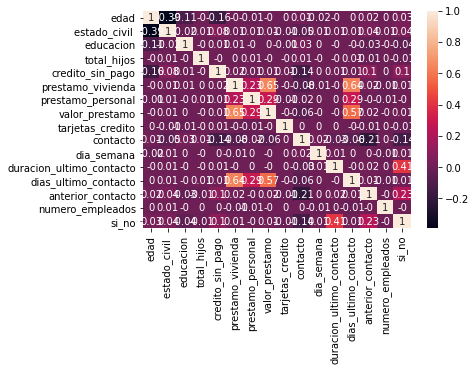

In [ ]:
correlation_matrix=df.corr().round(2)
sns.heatmap(data=correlation_matrix,annot=True)
#fig, ax = plt.subplots(figsize=(11.7, 8.27))
#sns.heatmap(data=correlation_matrix,annot=True).set({'figure.figsize':(11.7,8.27)})

De acuerdo con la matriz de correlación, las variables que tienen mejor correlación son valor_prestamo con prestamo_vivienda (0.65), dias_ultimo_contacto con prestamo_vivienda (0.64). En cuanto a las variables asignadas (edad, educación, préstamo_personal, número_empleados, tarjetas de crédito, si_no)La matriz de correlación indica que no existe una relación lineal entre una variable X y una variable Y; otra forma de ver esto es mirando los siguientes gráficos:

###Gráficas de las variables asignadas

Se crea un nuevo DataSet que solo contenga las variables asignadas.

In [ ]:
  filter_data = {"edad":df["edad"],"educacion":df["educacion"],"prestamo_personal":df["prestamo_personal"],
                "tarjetas_credito":df["tarjetas_credito"],"numero_empleados":df["numero_empleados"]}
filter_dataset = pd.DataFrame(data=filter_data)
print(filter_dataset)

       edad  educacion  prestamo_personal  tarjetas_credito  numero_empleados
0        44          1                  1                 5                88
1        53          0                  1                 0                14
2        28          2                  1                 0              1993
3        39          3                  1                 4              1338
4        55          1                  1                 4              1184
...     ...        ...                ...               ...               ...
41183    59          3                  2                 0               664
41184    31          1                  1                 4               736
41185    42          2                  2                 3                43
41186    48          5                  2                 4              1068
41187    25          3                  1                 3              1979

[41188 rows x 5 columns]


Gráfica de las variables

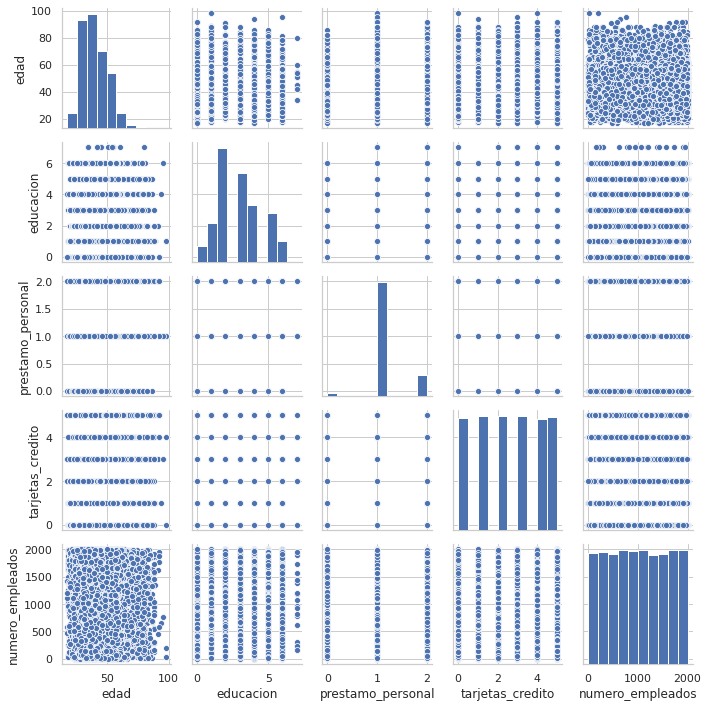

In [ ]:
sns.set(style='whitegrid', context='notebook')
features_plot = filter_dataset.columns
sns.pairplot(filter_dataset[features_plot], height=2.0);
plt.tight_layout()
plt.show()

Lo que se evidencia en los gráficos es la pobre correlación que existe entre los datos. A continuación se realizaron algunas de las gráficas para evidenciar la precisión de ellas. 

In [ ]:
X = pd.DataFrame(np.c_[filter_dataset['edad']], columns=['edad'])
Y = df['educacion']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print("x80%: "+str(X_train.shape) +", x20%: "+str(X_test.shape))
print("y80%: "+str(Y_train.shape) +", y20%: "+str(Y_test.shape))

x80%: (32950, 1), x20%: (8238, 1)
y80%: (32950,), y20%: (8238,)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

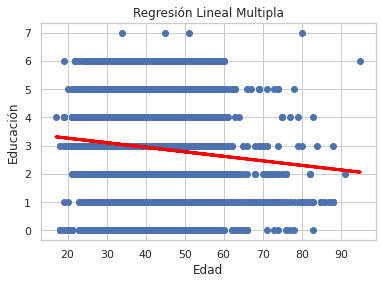


PRECISIÓN DEL MODELO REGRESIÓN LINEAL MULTIPLA
0.012482481388805922


In [ ]:
Y_pred = lin_model.predict(X_test)
plt.scatter(X_test['edad'], Y_test)
plt.plot(X_test, Y_pred, color='red', linewidth=3)
plt.title('Regresión Lineal Multipla')
plt.xlabel('Edad')
plt.ylabel('Educación')
plt.show()
print('\nPRECISIÓN DEL MODELO REGRESIÓN LINEAL MULTIPLA')
print(lin_model.score(X_train, Y_train))

###Si se toman todas las variables para el entrenamiento ¿Qué sucede?

In [ ]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
y = filter_dataset.loc[:,'edad'] 
X = filter_dataset.drop(['edad'], axis=1)       #tomaremos todos los columnas para entrenar
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print("TRAIN--> X: {} - Y: {}".format(X_train.shape,y_train.shape))
print("TEST--> X: {} - Y: {}".format(X_test.shape,y_test.shape))

TRAIN--> X: (32950, 4) - Y: (32950,)
TEST--> X: (8238, 4) - Y: (8238,)


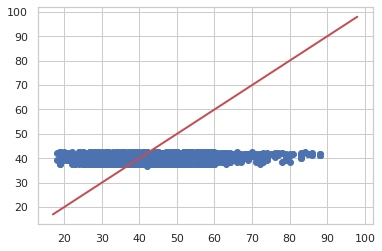

Precisión del modelo: 0.009424153557733073


In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
#entrenamos
regressor.fit(X_train, y_train)
#predecimos
pred = regressor.predict(X_test)

#visualizar la predicción en los datos de testeo
plt.scatter(y_test, pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], c='r', lw=2)
plt.show()
print("Precisión del modelo: "+str(regressor.score(X_test, y_test)))

###Calculando la precisión de la regresión lineal

Para la evaluación de precisión de un modelo se utiliza: 
*   RSE la cual es la cantidad media de la cual la respuesta se desviará de la recta de regresión. Un valor menor indica un mejor ajuste.
*   R^2 mide la variabilidad 



In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
# evaluación del modelo para el conjunto de entrenamiento
y_train_predict = regressor.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("El modelo de rendimiento para el conjunto de entrenamiento.")
print("--------------------------------------")
print('RMSE es {}'.format(rmse))
print('R2 resultado es {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict =regressor.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("El rendimiento del modelo para el conjunto de pruebas")
print("--------------------------------------")
print('RMSE es {}'.format(rmse))
print('R2 resultado es {}'.format(r2))

El modelo de rendimiento para el conjunto de entrenamiento.
--------------------------------------
RMSE es 37.18441285451017
R2 resultado es -615.5430116898399


El rendimiento del modelo para el conjunto de pruebas
--------------------------------------
RMSE es 37.167213326205236
R2 resultado es -618.5587215237156


##Regresión logística

In [ ]:
data = {"edad":df["edad"],"educacion":df["educacion"],"prestamo_personal":df["prestamo_personal"],
        "tarjetas_credito":df["tarjetas_credito"],"numero_empleados":df["numero_empleados"]}
X = pd.DataFrame(data=data)
y = np.array(df["si_no"]) 

x_train , x_test , y_train , y_test = train_test_split(X,y,random_state=4, test_size=0.2)

#instancia de LogisticRegression
regresion_logistica = LogisticRegression()
#Entrenamiento
regresion_logistica.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_prediccion =regresion_logistica.predict(x_test)
#verificar exactitud
exactitud = metrics.accuracy_score(y_test, y_prediccion)
print("exactitud porcentual = "+str(100*exactitud))

exactitud porcentual = 88.50449138140326


###Predicciones

In [ ]:
pruebaarray = np.array([[25,2,2,3,1900],[30,0,2,5,125],[80,2,2,3,5000],[30,3,1,3,150],[28,4,1,0,200],[31,5,2,5,500]])
x_nuevo = pd.DataFrame(pruebaarray,columns=["edad","educacion","prestamo_personal","tarjetas_credito","numero_empleados"])
y_prediccion = regresion_logistica.predict(x_nuevo)
print(y_prediccion)

[0 0 0 0 0 0]


##Conclusiones

-Variables con mejor correlación: la única variable que tuvo una correlación medianamente buena con las demás fue la de "educación", ya que la precisión de esos modelos llegaba a un 1%, mientras que las demás llegaban a tener un 0% de correlación.

-El modelo con mayor precisión fue la regresión logística, con una precisión del 88.5% 

- Al dejar la división de los datos por default (25% test - 75% entrenamiento) se presenta un error el cual indica que el total de iteraciones alcanzó el límite para lo cual, nos indica aumentar el número de iteraciones o la escala de los datos; por esta razón, modificacmos la división de los datos a un 80% entrenamiento - 20% test

